# Частные производные функций нескольких переменных. Домашнее задание
## Раздел 1
### Найдите частные производные данных функций. Постройте графики этих производных, а также найдите их нули:
1. $f(x, y) = x(y-5)^2$
2. $f(x, y) = (y - e/20)^2sin(\pi x)$
3. $f(x, y) = xsin(x)sin(y - 2)$

### Import

In [54]:
import sympy as sp
from sympy.plotting import plot3d

x, y = sp.symbols('x y')
a0, a1, a2 = sp.symbols('a:3')
x1, x2 = sp.symbols('x1:3')

### Solve 1

In [23]:
f = x*(y - 5)**2
f

x*(y - 5)**2

In [24]:
dfx = sp.diff(f, x)
dfx

(y - 5)**2

In [12]:
dfy = sp.diff(f, y)
dfy

x*(2*y - 10)

In [14]:
sp.solve(dfx)

[5]

In [15]:
sp.solve(dfy)

[{x: 0}, {y: 5}]

### Plot 1

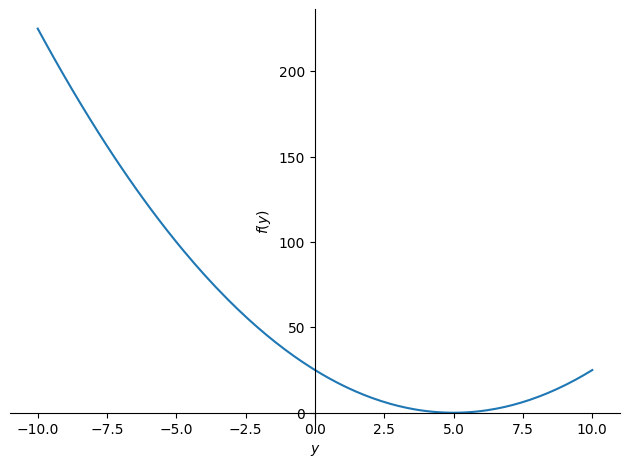

In [16]:
sp.plot(dfx)

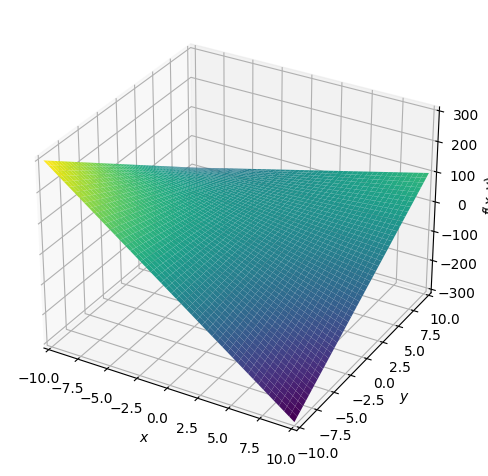

In [19]:
plot3d(dfy)

### Solve 2

In [25]:
f = (y - (sp.exp(1)/20))**2 * sp.sin(sp.pi*x)
f

(y - E/20)**2*sin(pi*x)

In [26]:
dfx = sp.diff(f, x)
dfx

pi*(y - E/20)**2*cos(pi*x)

In [27]:
dfy = sp.diff(f, y)
dfy

(2*y - E/10)*sin(pi*x)

In [28]:
sp.solve(dfx)

[{x: 1/2}, {x: 3/2}, {y: E/20}]

In [29]:
sp.solve(dfy)

[{x: 0}, {x: 1}, {y: E/20}]

### Plot 2

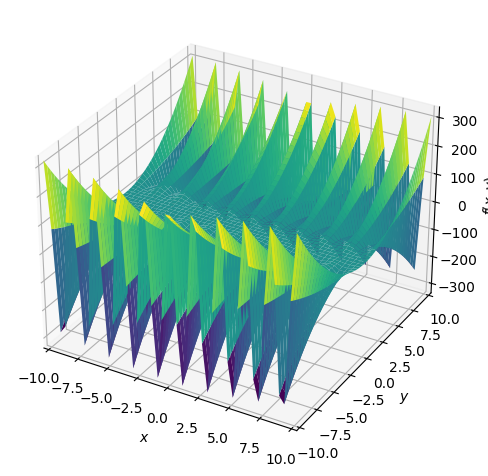

In [30]:
plot3d(dfx)

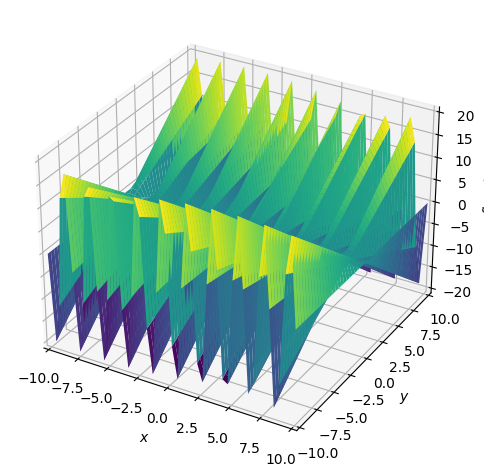

In [31]:
plot3d(dfy)

### Solve 3

In [32]:
f = x*sp.sin(x)*sp.sin(y - 2)
f

x*sin(x)*sin(y - 2)

In [34]:
dfx = sp.diff(f, x)
dfx

x*sin(y - 2)*cos(x) + sin(x)*sin(y - 2)

In [35]:
dfy = sp.diff(f, y)
dfy

x*sin(x)*cos(y - 2)

In [38]:
sp.solve(dfx)

[{y: 2}, {y: 2 + pi}]

In [37]:
sp.solve(dfy)

[{x: 0}, {x: pi}, {y: 2 + 3*pi/2}, {y: pi/2 + 2}]

### Plot 3

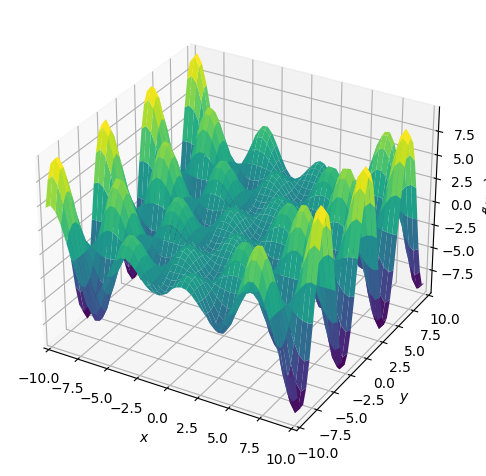

In [39]:
plot3d(dfx)

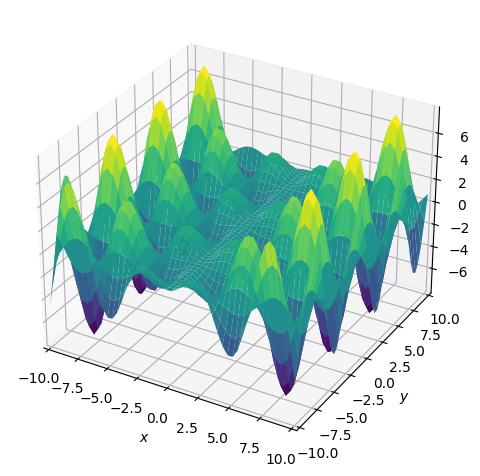

In [40]:
plot3d(dfy)

## Раздел 2
### Найдите наилучшую, с точки зрения среднеквадратичной ошибки, функцию, приближающую зависимость времени разгона автомобиля до 100 км/ч от его массы и мощности двигателя. Данные для аппроксимации в таблице ниже.

In [44]:
import pandas as pd

data = {'Масса авто' : [1945, 1495, 1570, 1520],
         'Мощность двигателя': [560, 340, 343, 431],
         'Время разгона' : [4.3, 4.9, 5.2, '?']}
pd.DataFrame(data=data)

,Масса авто,Мощность двигателя,Время разгона
0,1945,560,4.3
1,1495,340,4.9
2,1570,343,5.2
3,1520,431,?


### Solve

In [46]:
mse = 1/3 * ((a2*1945 + a1*560 + a0 - 4.3)**2 +
             (a2*1495 + a1*340 + a0 - 4.9)**2 + 
             (a2*1570 + a1*343 + a0 - 5.2)**2)
mse

1261008.33333333*(a0/1945 + 112*a1/389 + a2 - 0.00221079691516709)**2 + 821633.333333333*(a0/1570 + 343*a1/1570 + a2 - 0.00331210191082803)**2 + 745008.333333333*(a0/1495 + 68*a1/299 + a2 - 0.00327759197324415)**2

In [49]:
dmse2 = sp.diff(mse , a2)
dmse2

3340.0*a0 + 1424006.66666667*a1 + 5655300.0*a2 - 15902.0

In [51]:
dmse1 = sp.diff(mse, a1)
dmse1

828.666666666667*a0 + 364566.0*a1 + 1424006.66666667*a2 - 3905.06666666667

In [52]:
dmse0 = sp.diff(mse, a0)
dmse0

2.0*a0 + 828.666666666667*a1 + 3340.0*a2 - 9.6

In [53]:
sp.solve([dmse2, dmse1, dmse0])

{a0: 2.24910891085849, a1: -0.0118811881188827, a2: 0.00447524752478956}

In [56]:
f = 0.00447524752478956*x2 - 0.0118811881188827*x1 + 2.24910891085849
f.subs({x2: 1520, x1: 431})

3.93069306930018